In [48]:
# Importing liberiries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd

In [49]:
# Importing the dataset

data = pd.read_csv('weather-dataset/seattle-weather.csv')

In [50]:
data.shape
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [51]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [52]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [53]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

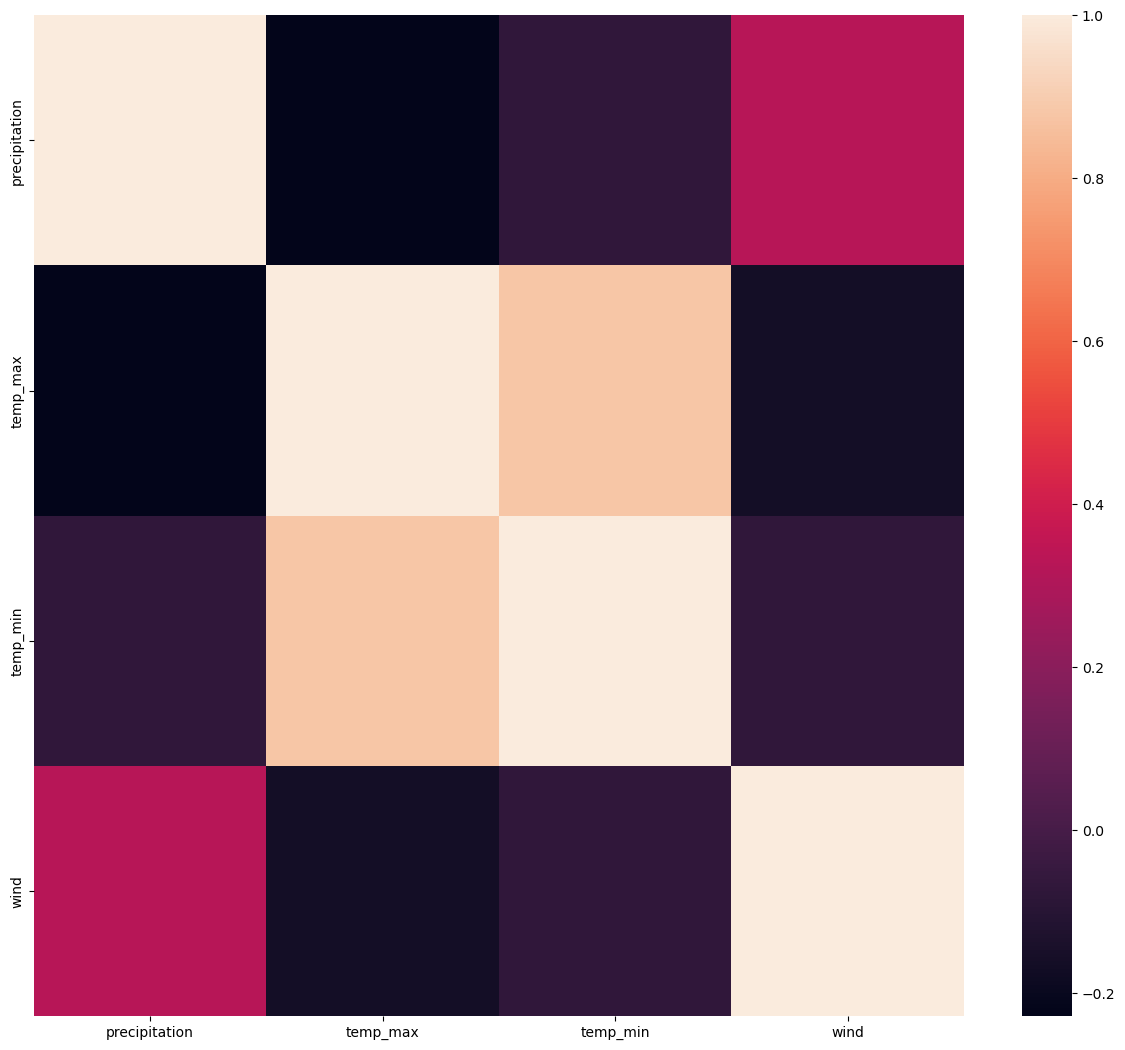

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

In [55]:
data.replace(to_replace ="rain", value = 2, inplace = True)
data.replace(to_replace ="drizzle", value = 3, inplace = True)
data.replace(to_replace ="fog", value = 4, inplace = True)
data.replace(to_replace ="sun", value = 5, inplace = True)
data.replace(to_replace ="snow", value = 1, inplace = True)
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,3
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,4
1459,2015-12-30,0.0,5.6,-1.0,3.4,5


In [56]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [57]:
x=data.drop(['date','weather'],axis=1)
y=data['weather']

In [58]:
y

0       3
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    4
1459    5
1460    5
Name: weather, Length: 1461, dtype: int64

In [59]:
x.corr()    # checking correlation to drop unnecessary variable


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


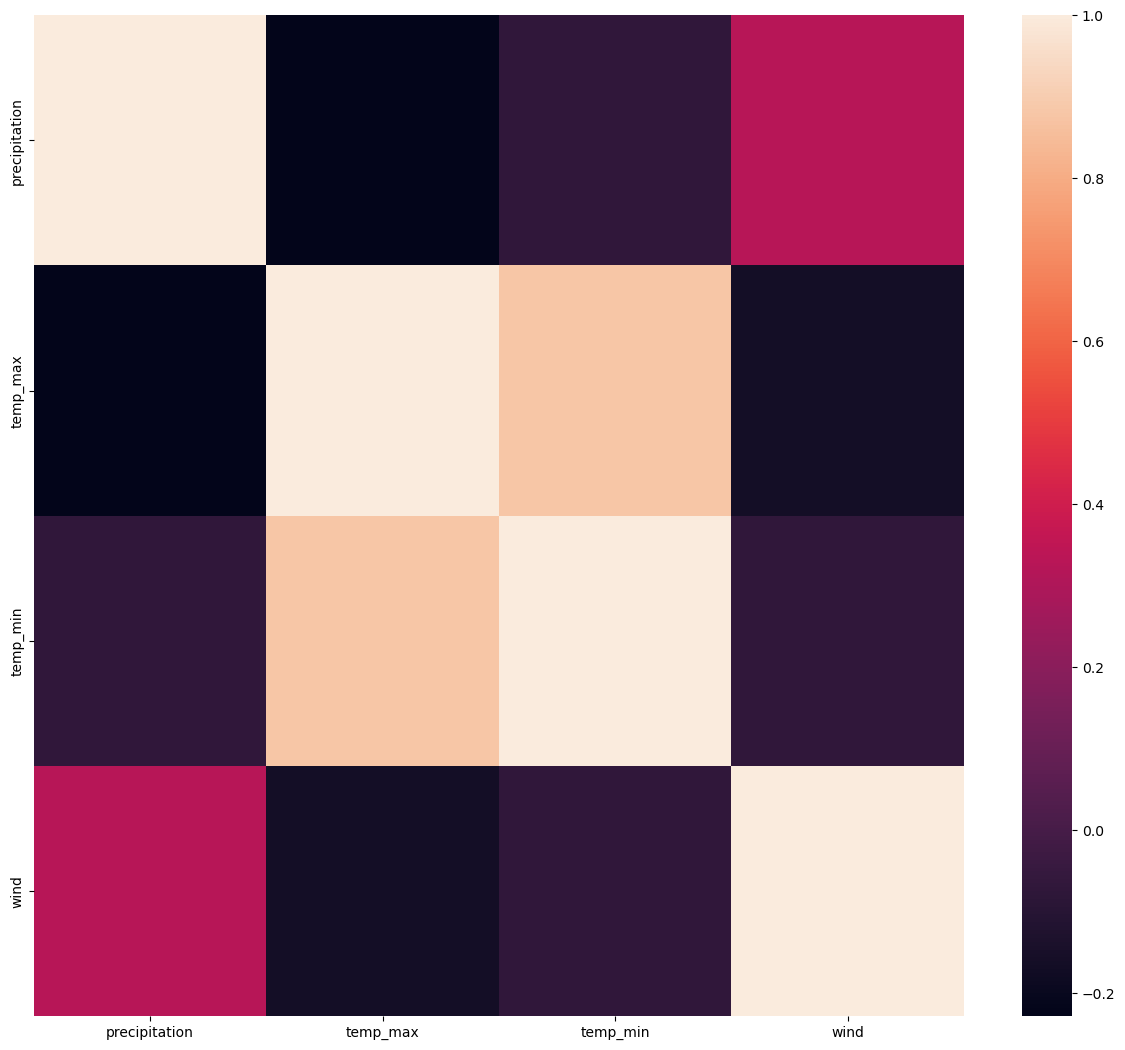

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,13))
sns.heatmap(x.corr())
plt.show()

In [62]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [63]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [64]:
# Splitting the dataset into train data and test data
# Train dataset is 70% of and Test dataset is 30% of original dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print("dime input train",x_train.shape)
print("dime input test", x_test.shape)

dime input train (1022, 4)
dime input test (439, 4)


In [65]:
# Using Random Forest Classifier algorithm to predict the weather
# Training model on test data

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
RF.fit(x_train,y_train)
#y_pred = RF.predict(x_test)


RandomForestClassifier(max_depth=32, n_estimators=120, random_state=1)

In [66]:
y_test_forest = RF.predict(x_test)
y_train_forest = RF.predict(x_train)

In [67]:
# Finding accuracy of model using test data
from sklearn.metrics import accuracy_score
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.996
Random forest: Accuracy on test Data: 0.825


In [68]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest Classifier', acc_train_forest, acc_test_forest)

In [69]:
# To see importance of each variable in prediction
RF.feature_importances_

array([0.51124794, 0.1985589 , 0.14401184, 0.14618131])

In [70]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(alpha=0.0001,activation='relu', solver='adam',batch_size='auto'
                    ,beta_1=0.9, beta_2=0.999, epsilon=1e-08, hidden_layer_sizes=([100,100,100]))

In [71]:
#Fitting the training data to the network
classifier.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=[100, 100, 100])

In [72]:
#predicting the target value from the model for the samples 2
y_test_mlp = classifier.predict(x_test)
y_train_mlp = classifier.predict(x_train)

In [73]:
#computing the accuracy of the model performance 3
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.864
Multilayer Perceptrons: Accuracy on test Data: 0.845


In [74]:
#storing the results. The below mentioned order of parameter passing is important.4
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [75]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


In [76]:
sgdmodel_classifier=SGDClassifier(loss="modified_huber", penalty="l2",)
sgdmodel_classifier.fit(x_train , y_train)

SGDClassifier(loss='modified_huber')

In [77]:
#predicting the target value from the model for the samples 
y_test_sgd = sgdmodel_classifier.predict(x_test)
y_train_sgd = sgdmodel_classifier.predict(x_train)

In [78]:
#computing the accuracy of the model performance
acc_train_sgd = accuracy_score(y_train,y_train_sgd)
acc_test_sgd = accuracy_score(y_test,y_test_sgd)

print("SGDClassifier: Accuracy on training Data: {:.3f}".format(acc_train_sgd))
print("SGDClassifier: Accuracy on test Data: {:.3f}".format(acc_test_sgd))

SGDClassifier: Accuracy on training Data: 0.806
SGDClassifier: Accuracy on test Data: 0.784


In [79]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SGD Classifier', acc_train_sgd, acc_test_sgd)

In [80]:
svcmodel_classifier=SVC(kernel='linear')
svcmodel_classifier.fit(x_train , y_train)

SVC(kernel='linear')

In [81]:
#predicting the target value from the model for the samples 
y_test_svc = svcmodel_classifier.predict(x_test)
y_train_svc = svcmodel_classifier.predict(x_train)

In [82]:
#computing the accuracy of the model performance
acc_train_svc = accuracy_score(y_train,y_train_svc)
acc_test_svc = accuracy_score(y_test,y_test_svc)

print("SVCClassifier: Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("SVCClassifier: Accuracy on test Data: {:.3f}".format(acc_test_svc))

SVCClassifier: Accuracy on training Data: 0.856
SVCClassifier: Accuracy on test Data: 0.836


In [83]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVC Classifier', acc_train_svc, acc_test_svc)

In [84]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Random Forest Classifier,0.996,0.825
1,Multilayer Perceptrons,0.864,0.845
2,SGD Classifier,0.806,0.784
3,SVC Classifier,0.856,0.836


In [85]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Multilayer Perceptrons,0.864,0.845
3,SVC Classifier,0.856,0.836
0,Random Forest Classifier,0.996,0.825
2,SGD Classifier,0.806,0.784


In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
cvs_classifier=cross_val_score(estimator = classifier, X = x_train, y = y_train,cv=10)
cvs_classifier.mean()

0.8482962116885588

# fog only

replace ="fog", value = 4


In [88]:
newdf = data[(data.weather == 4) ]
newdf.value_counts()

date        precipitation  temp_max  temp_min  wind  weather
2012-07-11  0.0            27.8      13.3      2.9   4          1
2015-02-11  0.0            12.8      5.6       1.0   4          1
2015-05-20  0.0            23.3      10.6      1.8   4          1
2015-05-15  0.0            20.0      9.4       2.8   4          1
2015-05-11  0.0            13.9      10.0      2.5   4          1
                                                               ..
2014-09-04  0.0            23.9      11.1      3.1   4          1
2014-08-07  0.0            25.6      13.3      2.4   4          1
2014-08-06  0.0            26.1      15.0      2.2   4          1
2014-07-19  0.0            25.6      15.0      5.4   4          1
2015-12-29  0.0            7.2       0.6       2.6   4          1
Length: 101, dtype: int64